In [20]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

In [3]:
data, target = housing.data, housing.target

In [ ]:
### 목적 
the aim is to predict the median value of houses in an area in California.

### 방법 
The target to be predicted is a continuous variable and not anymore discrete. This task is called regression.

In [4]:
### To simplify future visualization, let’s transform the prices from the 100 (k$) range to the thousand dollars (k$) range. 

target *= 100
target.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: MedHouseVal, dtype: float64

In [15]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data, target)

DecisionTreeRegressor(random_state=0)

In [7]:
# we would like to know its potential generalization performance once deployed in production. For this purpose, we use the mean absolute error, which gives us an error in the native unit, i.e. k$

from sklearn.metrics import mean_absolute_error

traget_predicted = regressor.predict(data)

### an error is a metric for which lower values mean better results.
score = mean_absolute_error(target, traget_predicted)
print(f'{score :.2f}')

0.00


### Error가 0인 이유
Indeed, we trained and predicted on the same dataset. Since our decision tree was fully grown, every sample in the dataset is stored in a leaf node. Therefore, our decision tree fully memorized the dataset given during fit and therefore made no error when predicting

**we call it the emprical error or training error**

### 우리가 추구하는 방향

We trained a predictive model to minimize the training error but our aim is to minimize the error on data that has not been seen during training.

**This error is also called the generalization error or the “true” testing error.**

In [16]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0)

In [17]:
regressor.fit(data_train,target_train)

DecisionTreeRegressor(random_state=0)

In [19]:
target_precicted = regressor.predict(data_train)
score = mean_absolute_error(target_train, target_precicted)
print(f'{score : .2f}')

 0.00


### test_target_split의 단점
we could have been lucky when we did our random split of our limited dataset and isolated some of the easiest cases to predict in the testing set just by chance: the estimation of the testing error would be overly optimistic, in this case.

### Cross validation
Cross-validation allows estimating the robustness of a predictive model by repeating the splitting procedure. It will give several training and testing errors and thus some estimate of the variability of the model generalization performance.

### Cross validation - shuffle-split
iteration 내 데이터가 중복됨.
![photo](data/10.png)

### Cross validation 내 error metric
all error metrics in scikit-learn, like mean_absolute_error, can be transformed into a score to be used in cross_validate. To do so, you need to pass a string of the error metric with an additional neg_ string at the front to the parameter scoring; for instance scoring="neg_mean_absolute_error". In this case, the negative of the mean absolute error will be computed which would be equivalent to a score.

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 40, test_size=0.3, random_state=0)
cv_results = cross_validate(regressor, data,target, cv=cv, scoring='neg_mean_absolute_error')

cv_results = pd.DataFrame(cv_results)

<AxesSubplot:ylabel='Frequency'>

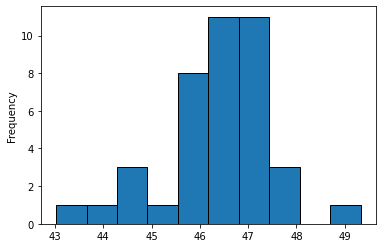

In [25]:
cv_results['test_score'] = - cv_results['test_score']
cv_results['test_score'].plot.hist(bins=10, edgecolor='black')

In [30]:
print(f"{cv_results['test_score'].mean() : .2f}, {cv_results['test_score'].std() : .2f}")

 46.36,  1.17


### return_estimator
Cross-validation한 결과를 하나하나 뜯어볼 수 있는 kwarg임.

In [34]:
cv_results = cross_validate(regressor, data, target, return_estimator= True)

The five decision tree regressors corresponds to the five fitted decision trees on the different folds. 

In [35]:
cv_results['estimator']

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0)]

### Quiz

1. often makes prediction errors, even on training sample

2. is too constrained and thus limited by its expressivity / focuses too much on noisy details of the training set